# ILS-Z639: Social Media Mining
Paper 3: Topic Modelling and Sentiment Analysis

## Data Collection

---

### Importing the necessary libraries

In [32]:
import praw
from langdetect import detect

import pandas as pd
import numpy as np
import datetime

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

### Initializing reddit API

In [33]:
reddit = praw.Reddit(
    client_id="hlV_n6YuNDW0aSNoNAyQCg",
    client_secret="O0K6QBLt3_Uo1yKQSxoUAYHpEm2BGw",
    user_agent="ThisIsYoosh "
)

### Defining some functions

#### Language check

In [34]:
def is_english(sentence):
    try:
        language = detect(sentence)
        return language == 'en'
    except:
        return False

#### Function to fetch data

In [35]:
def get_reddit_data(search_query, subreddit_name, post_num, comment_num):
    subreddit = []
    title = []
    body = []
    date = []
    flair = []
    comments = []
    search_results = reddit.subreddit(subreddit_name).search(search_query, sort="relevance", time_filter="all", limit=post_num)
    for submission in search_results:
        if submission.title not in title and is_english(submission.title) and datetime.datetime.utcfromtimestamp(submission.created_utc).year >= 2018:
            ci = []
            subreddit.append(submission.subreddit.display_name)
            title.append(submission.title)
            body.append(submission.selftext)
            flair.append(submission.link_flair_text)
            date.append(datetime.datetime.utcfromtimestamp(submission.created_utc).year)
            top_comments = submission.comments.list()[:comment_num]
            for comment in top_comments:
                if isinstance(comment, praw.models.MoreComments):
                    continue
                if comment.body in ["[deleted]", "[removed]"]:
                    continue
                if comment.author and comment.author.name in ["AutoModerator", "AssistantBOT"]:
                    continue
                ci.append(comment.body)
            comments.append(ci)
    df = pd.DataFrame({
        'Subreddit': subreddit,
        'Flair': flair,
        'Title': title,
        'Text': body,
        'Posted Date': date,
        'Comments': comments
    })
    return df

### Brand data for sentiment analysis

#### Zara

In [36]:
df_11 = get_reddit_data('Zara fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_12 = get_reddit_data('Zara fast fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_1 = pd.concat([df_11, df_12])
df_1 = df_1.drop_duplicates(subset=['Title', 'Subreddit'])

#### Nike

In [37]:
df_21 = get_reddit_data('Nike fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_22 = get_reddit_data('Nike fast fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_2 = pd.concat([df_21, df_22])
df_2 = df_2.drop_duplicates(subset=['Title', 'Subreddit'])

#### H&M

In [38]:
df_31 = get_reddit_data('H&M fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_32 = get_reddit_data('H&M fast fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_3 = pd.concat([df_31, df_32])
df_3 = df_3.drop_duplicates(subset=['Title', 'Subreddit'])

##### Shein

In [39]:
df_41 = get_reddit_data('Shein fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_42 = get_reddit_data('Shein fast fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_4 = pd.concat([df_41, df_42])
df_4 = df_4.drop_duplicates(subset=['Title', 'Subreddit'])

#### Adidas

In [40]:
df_51 = get_reddit_data('Adidas fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_52 = get_reddit_data('Adidas fast fashion', 'All', 25, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_5 = pd.concat([df_51, df_52])
df_5 = df_5.drop_duplicates(subset=['Title', 'Subreddit'])

#### All brands combined
The idea is to perform sentiment analysis as well as see if people mention these brands doing something unethical

In [41]:
df_all_brands = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)
df_all_brands = df_all_brands
df_all_brands = df_all_brands.drop_duplicates(subset=['Title', 'Subreddit'])

### Visualizing trends

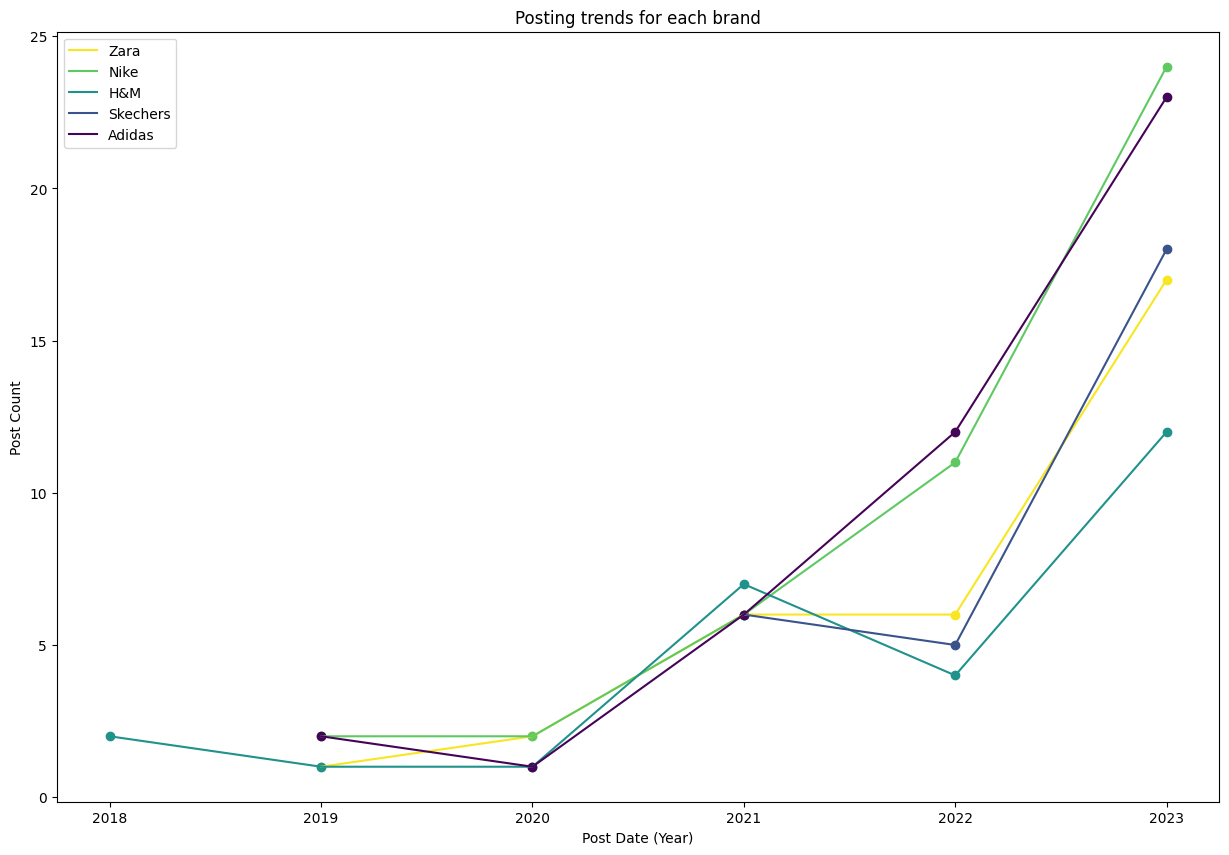

In [42]:
date_1 = dict(Counter(sorted(map(int, list(df_1['Posted Date'])))))
date_2 = dict(Counter(sorted(map(int, list(df_2['Posted Date'])))))
date_3 = dict(Counter(sorted(map(int, list(df_3['Posted Date'])))))
date_4 = dict(Counter(sorted(map(int, list(df_4['Posted Date'])))))
date_5 = dict(Counter(sorted(map(int, list(df_5['Posted Date'])))))

colors = sns.color_palette('viridis_r', 100)
plt.figure(figsize=(15, 10))
plt.title('Posting trends for each brand')
plt.xlabel("Post Date (Year)")
plt.ylabel("Post Count")
plt.plot(list(date_1.keys()), list(date_1.values()), color=colors[0], label='Zara')
plt.scatter(list(date_1.keys()), list(date_1.values()), color=colors[0])
plt.plot(list(date_2.keys()), list(date_2.values()), color=colors[24], label='Nike')
plt.scatter(list(date_2.keys()), list(date_2.values()), color=colors[24])
plt.plot(list(date_3.keys()), list(date_3.values()), color=colors[49], label='H&M')
plt.scatter(list(date_3.keys()), list(date_3.values()), color=colors[49])
plt.plot(list(date_4.keys()), list(date_4.values()), color=colors[74], label='Skechers')
plt.scatter(list(date_4.keys()), list(date_4.values()), color=colors[74])
plt.plot(list(date_5.keys()), list(date_5.values()), color=colors[99], label='Adidas')
plt.scatter(list(date_5.keys()), list(date_5.values()), color=colors[99])
plt.legend()
plt.show()

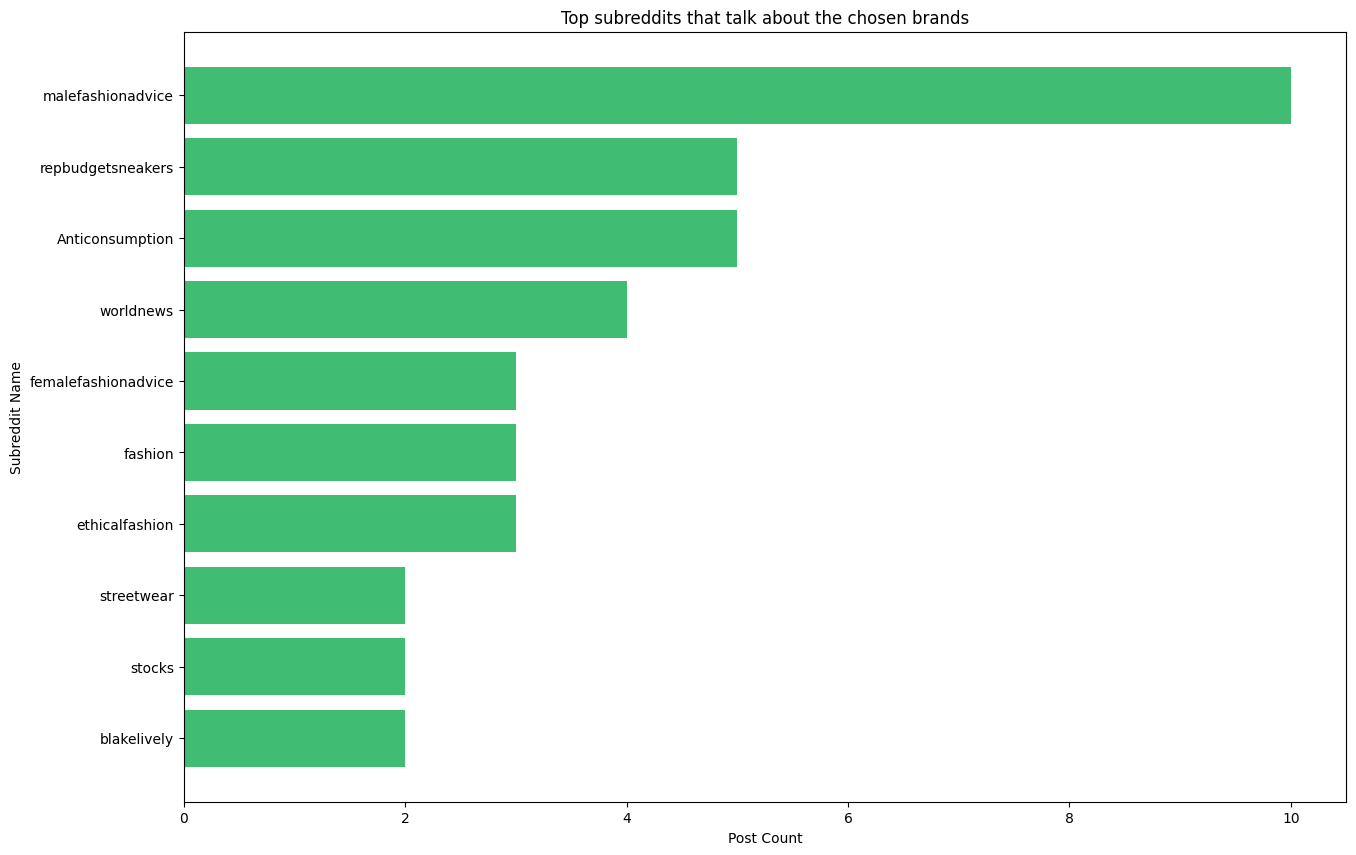

In [43]:
sr = dict(Counter(sorted(list(df_all_brands['Subreddit']))))
y, x = zip(*sorted(zip(sr.values(), sr.keys())))
y = y[-10:]
x = x[-10:]
plt.figure(figsize=(15, 10))
plt.title("Top subreddits that talk about the chosen brands")
plt.xlabel("Post Count")
plt.ylabel("Subreddit Name")
plt.barh(x, y, color=colors[30])
plt.show()

### Topic modelling data

#### Data about sweat shop practices
The idea is to see if the topics obtained contain names of some top brands

In [44]:
df_61 = get_reddit_data('Sweat shops', 'All', 50, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_62 = get_reddit_data('Fast Fashion sweat shops', 'All', 50, 25).drop_duplicates(subset=['Title', 'Subreddit'])
df_6 = pd.concat([df_61, df_62])
df_6 = df_6.drop_duplicates(subset=['Title', 'Subreddit'])

#### Top subreddits that mention sweat shops

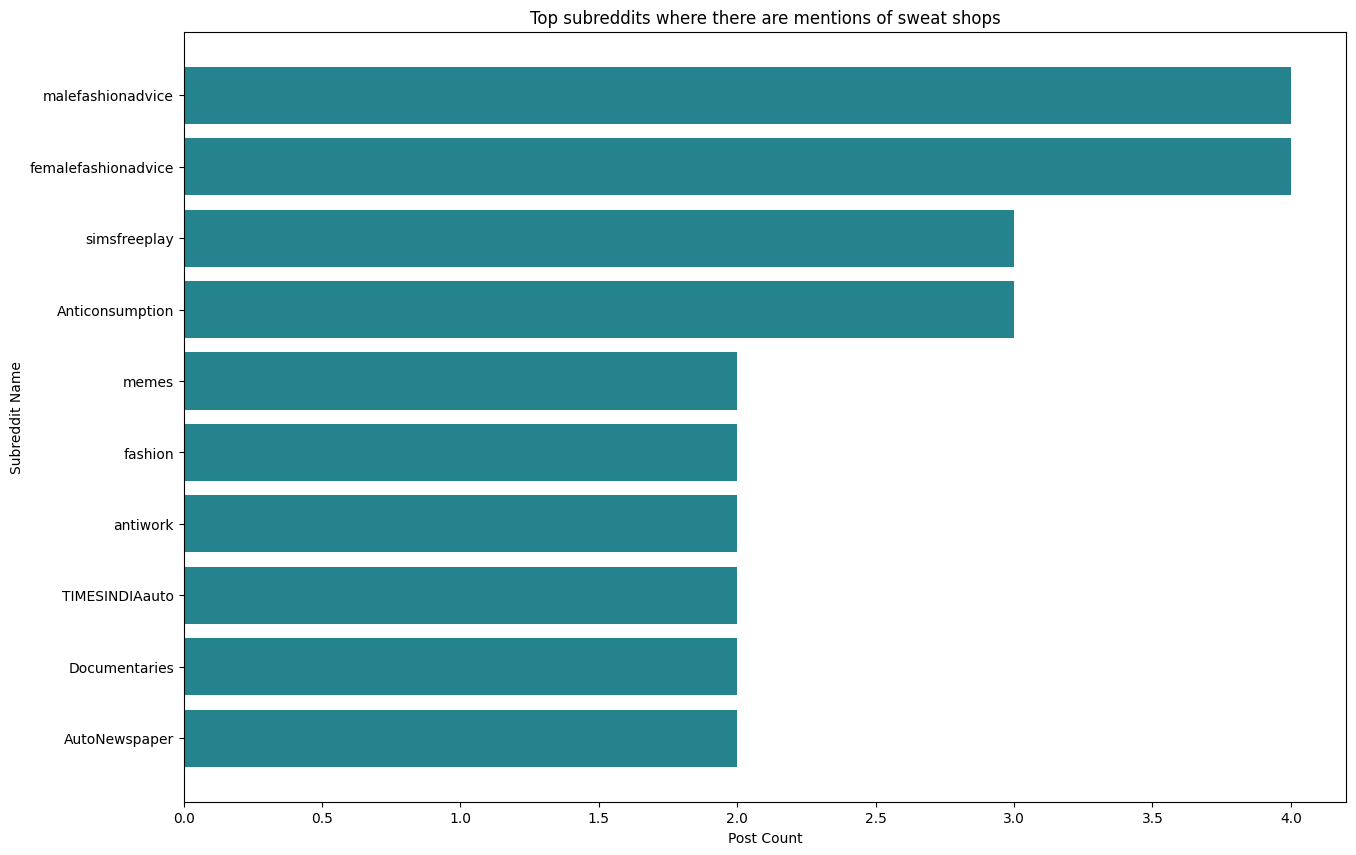

In [45]:
sr1 = dict(Counter(sorted(list(df_6['Subreddit']))))
y, x = zip(*sorted(zip(sr1.values(), sr1.keys())))
y = y[-10:]
x = x[-10:]
plt.figure(figsize=(15, 10))
plt.title("Top subreddits where there are mentions of sweat shops")
plt.xlabel("Post Count")
plt.ylabel("Subreddit Name")
plt.barh(x, y, color=colors[55])
plt.show()

#### Data about the fast fashion industry in general
The idea is to see if people talk about sweat shop practices when discussing fast fashion

In [46]:
df_7 = get_reddit_data('Fast fashion', 'All', 100, 25).drop_duplicates(subset=['Title', 'Subreddit'])

#### Top subreddits that talk about fast fashion

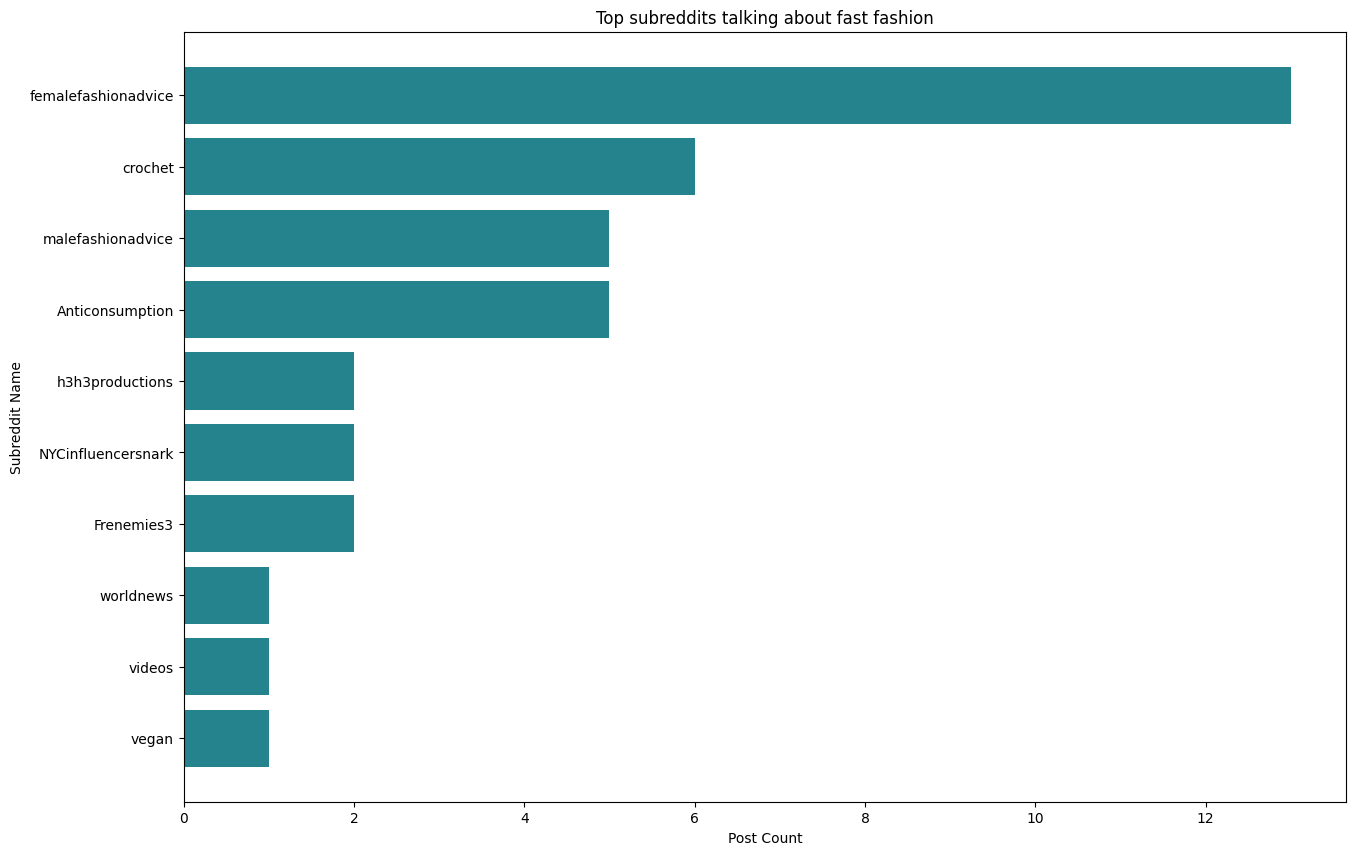

In [47]:
sr2 = dict(Counter(sorted(list(df_7['Subreddit']))))
y, x = zip(*sorted(zip(sr2.values(), sr2.keys())))
y = y[-10:]
x = x[-10:]
plt.figure(figsize=(15, 10))
plt.title("Top subreddits talking about fast fashion")
plt.xlabel("Post Count")
plt.ylabel("Subreddit Name")
plt.barh(x, y, color=colors[55])
plt.show()

In [48]:
df_1 = df_1.explode('Comments')
df_1.to_csv('zara.csv', index=False)

df_2 = df_2.explode('Comments')
df_2.to_csv('nike.csv', index=False)

df_3 = df_3.explode('Comments')
df_3.to_csv('hm.csv', index=False)

df_4 = df_4.explode('Comments')
df_4.to_csv('shein.csv', index=False)

df_5 = df_5.explode('Comments')
df_5.to_csv('adidas.csv', index=False)

df_all_brands = df_7.explode('Comments')
df_all_brands.to_csv('all_brands.csv', index=False)

df_6 = df_6.explode('Comments')
df_6.to_csv('sweat_shops.csv', index=False)

df_7 = df_7.explode('Comments')
df_7.to_csv('fast_fashion.csv', index=False)


---